# ESRB Rating Project

## Table Of Contents
<font size=3rem>
    
0 -**[ INTRO](#INTRODUCTION)<br>**
1 -**[ OBTAIN](#OBTAIN)**<br>
2 -**[ SCRUB](#SCRUB)**<br>
3 -**[ EXPLORE](#EXPLORE)**<br>
4 -**[ MODEL](#MODEL)**<br>
5 -**[ INTERPRET](#INTERPRET)**<br>
6 -**[ CONCLUSIONS & RECCOMENDATIONS](#Conclusions-&-Recommendations)<br>**
</font>
___

# INTRODUCTION

- Student: Cody Freese
- Pace: Part Time
- Amber Yandow

In this notebook we will analyze ESRB Ratings and develop a model for predicting these ratings.

What is ESRB and what are the various Categories?
ESRB stands for Entertainment Software Rating Board. It is an American regulatory organization for assigning content ratings to consumer Video games. It was established in 1994 in response to criticism of contoversial video games like mortal Kombat "Fatality". ESRB has the following labels:

RP = Ratings Pending (1994-present) This symbol is used in promotional materials for games which have not yet been assigned a final rating by the ESRB.

EC = Early Childhood (1994-2018) Games with this rating contain content which is aimed towards a preschool audience. They do not contain content that parents would find objectionable to this audience.No longer used as of 2018 due to few titles using this, and all titles with this rating are replaced with the E rating.

E = Everyone (1994-present) Games with this rating contain content which the ESRB believes is "generally suitable for all ages".They can contain content such as infrequent use of "mild"/cartoon violence and mild language.This rating was known as Kids to Adults (K-A) until 1998, when it was renamed "Everyone".

E10+ = Everyone 10+ (2005-present) Games with this rating contain content which the ESRB believes is generally suitable for those aged 10 years and older. They can contain content with an impact higher than the "Everyone" rating can accommodate, but still not as high as to warrant a "Teen" rating, such as a larger amount of violence, mild language, crude humor, or suggestive content.

T = Teen (1994-present) Games with this rating contain content which the ESRB believes is generally suitable for those aged 13 years and older; they can contain content such as moderate amounts of violence (including small amounts of blood), mild to moderate use of language or suggestive themes, sexual content, partial nudity and crude humor.

M17+ = Mature 17+ (1994-present) Games with this rating contain content which the ESRB believes is generally suitable for those aged 17 years and older; they can contain content with an impact higher than the "Teen" rating can accommodate, such as intense and/or realistic portrayals of violence (including blood, gore, mutilation, and depictions of death), strong sexual themes and content, nudity, and more frequent use of strong language.

A => Adults (1994-present) Games with this rating contain content which the ESRB believes is only suitable for those aged 18 years and older; they contain content with an impact higher than the "Mature" rating can accommodate, such as graphic sexual themes and content, extreme portrayals of violence, or unsimulated gambling with real currency. The majority of AO-rated titles are pornographic adult video games; the ESRB has seldom issued the AO rating solely for violence.

## Import Tools

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

import statsmodels as sm

import sklearn.preprocessing as preprocessing
from sklearn.decomposition import PCA

from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,
                              BaggingClassifier,StackingClassifier,RandomForestRegressor)


from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

C:\Users\c_fre\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def set_frameon(self, b):
        self.patch.set_visible(b)
        self.stale = True

In [4]:
#Classifier Performance Visual
def visual(trueVals, predictedVals, classifierName):
    plt.figure(figsize=(7, 7))
    plt.scatter(trueVals, predictedVals, color = 'green')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    
    acc = accuracy_score(trueVals, predictedVals)
    
    plt.title('performance of ' + str(classifierName) + 'Accuracy %:' + str(acc*100))
    plt.plot([0,1,2,3], [0,1,2,3], color = 'blue')
    plt.show()  

In [5]:
#Classification Function
def classification(X_train, y_train,X_test,y_test, classifier):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    classifier.fit(X_train, y_train.values.ravel())
    y_pred = classifier.predict(X_test)
    fig, ax = plt.subplots(figsize=(8,8))
    plot_confusion_matrix(estimator=classifier, X=X_test, y_true=y_test, ax=ax)
    plt.show()
    print(classification_report(y_test, y_pred))
    print(f'Accuracy:{round(accuracy_score(y_test,y_pred)*100, 2)}%')

In [6]:
# Label Distribution Function
def ratingplot(dataFrame, featureName, setName):
    uniqueVals = set(dataFrame[featureName])
    countArr =  []
    
    for mem in uniqueVals:
        countArr.append(len(dataFrame[dataFrame[featureName] == mem]))
    
    plt.figure(figsize=(17, 5))
    plt.subplot(1,2,1)
    plt.bar(list(uniqueVals), countArr, color = 'blue')
    plt.title(str(setName))
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.pie(countArr, labels = list(uniqueVals),autopct='%1.2f%%')
    plt.title(str(setName))
    plt.show()

In [7]:
# frame = combined_csv['title'].value_counts().to_frame()
# for i in range(len(combined_csv)):
#     for name in combined_csv: 
#         if combined_csv.at[i, 'title'] == name:
#                stars.at[i, 'number'] = 2 

# OBTAIN

In [8]:
# Import/Read
test_df = pd.read_csv('test_esrb.csv')
test_df.info()

train_df = pd.read_csv('Video_games_esrb_rating.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     500 non-null    object
 1   console                   500 non-null    int64 
 2   alcohol_reference         500 non-null    int64 
 3   animated_blood            500 non-null    int64 
 4   blood                     500 non-null    int64 
 5   blood_and_gore            500 non-null    int64 
 6   cartoon_violence          500 non-null    int64 
 7   crude_humor               500 non-null    int64 
 8   drug_reference            500 non-null    int64 
 9   fantasy_violence          500 non-null    int64 
 10  intense_violence          500 non-null    int64 
 11  language                  500 non-null    int64 
 12  lyrics                    500 non-null    int64 
 13  mature_humor              500 non-null    int64 
 14  mild_blood                

In [9]:
#Combine the Train/Test CSVs into one
combined_csv = test_df.append(train_df)
combined_csv.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2395 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2395 non-null   object
 1   console                   2395 non-null   int64 
 2   alcohol_reference         2395 non-null   int64 
 3   animated_blood            2395 non-null   int64 
 4   blood                     2395 non-null   int64 
 5   blood_and_gore            2395 non-null   int64 
 6   cartoon_violence          2395 non-null   int64 
 7   crude_humor               2395 non-null   int64 
 8   drug_reference            2395 non-null   int64 
 9   fantasy_violence          2395 non-null   int64 
 10  intense_violence          2395 non-null   int64 
 11  language                  2395 non-null   int64 
 12  lyrics                    2395 non-null   int64 
 13  mature_humor              2395 non-null   int64 
 14  mild_blood              

# SCRUB

- Datatypes appear correct

# EXPLORE

## Pivot Table, Describe & Counts

In [10]:
#Organized table by Rating and Console
combined_csv.pivot_table(index=["esrb_rating","console"])

alcohol_reference  animated_blood     blood  \
esrb_rating console                                                
E           0                 0.035857        0.000000  0.000000   
            1                 0.033962        0.000000  0.000000   
ET          0                 0.129747        0.006329  0.000000   
            1                 0.061033        0.037559  0.000000   
M           0                 0.000000        0.000000  0.436275   
            1                 0.003663        0.000000  0.388278   
T           0                 0.039916        0.010504  0.430672   
            1                 0.073048        0.012594  0.387909   

                     blood_and_gore  cartoon_violence  crude_humor  \
esrb_rating console                                                  
E           0              0.000000          0.000000     0.003984   
            1              0.000000          0.000000     0.007547   
ET          0              0.000000          0.006329     0.069620   
            1              0.000000          0.117371     0.061033   
M           0              0.406863          0.000000     0.029412   
            1              0.578755          0.000000     0.003663   
T           0              0.084034          0.010504     0.048319   
            1              0.060453          0.040302     0.138539   

                     drug_reference  fantasy_violence  intense_violence  \
esrb_rating console                                                       
E           0              0.000000          0.000000          0.000000   
            1              0.000000          0.000000          0.000000   
ET          0              0.012658          0.715190          0.085443   
            1              0.037559          0.582160          0.084507   
M           0              0.053922          0.117647          0.186275   
            1              0.069597          0.095238          0.315018   
T           0              0.056723          0.222689          0.132353   
            1              0.032746          0.113350          0.075567   

                     language    lyrics  mature_humor  mild_blood  \
esrb_rating console                                                 
E           0        0.000000  0.000000      0.000000    0.000000   
            1        0.000000  0.000000      0.000000    0.003774   
ET          0        0.072785  0.022152      0.009494    0.145570   
            1        0.070423  0.018779      0.004695    0.093897   
M           0        0.161765  0.063725      0.004902    0.024510   
            1        0.172161  0.069597      0.007326    0.021978   
T           0        0.195378  0.037815      0.027311    0.105042   
            1        0.148615  0.055416      0.005038    0.110831   

                     mild_cartoon_violence  mild_fantasy_violence  \
esrb_rating console                                                 
E           0                     0.031873               0.258964   
            1                     0.056604               0.139623   
ET          0                     0.025316               0.022152   
            1                     0.032864               0.028169   
M           0                     0.004902               0.004902   
            1                     0.000000               0.003663   
T           0                     0.014706               0.000000   
            1                     0.012594               0.007557   

                     mild_language  mild_lyrics  mild_suggestive_themes  \
esrb_rating console                                                       
E           0             0.051793     0.051793                0.000000   
            1             0.052830     0.052830                0.000000   
ET          0             0.037975     0.104430                0.072785   
            1             0.014085     0.112676                0.075117   
M           0             0.000000     0.000000         

In [11]:
#Checking values
combined_csv.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.00000,2395.000000,2395.000000
mean,0.479332,0.050522,0.008351,0.231315,0.127349,0.020042,0.051357,0.034238,0.230063,0.109395,0.112735,0.034656,0.009186,0.071816,0.021294,0.050104,0.028392,0.074322,0.043424,0.043424,0.158246,0.016284,0.022547,0.031315,0.047599,0.057620,0.104384,0.038831,0.108977,0.03048,0.022965,0.114823
std,0.499677,0.219065,0.091019,0.421762,0.333433,0.140172,0.220771,0.181878,0.420961,0.312199,0.316334,0.182944,0.095421,0.258237,0.144394,0.218206,0.166126,0.262348,0.203852,0.203852,0.365048,0.126592,0.148485,0.174205,0.212961,0.233072,0.305822,0.193232,0.311675,0.17194,0.149822,0.318874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
#Get a count of Yes/No
for column in combined_csv:
    print(combined_csv[column].value_counts())

Cities: Skylines                      2
Still Time                            2
The Girl and the Robot                2
South Park: The Stick of Truth        2
Future Unfolding                      2
                                     ..
Assassin's Creed Origins              1
Elliot Quest                          1
Anoxemia                              1
WRC 7 FIA World Rally Championship    1
Snow Fortress                         1
Name: title, Length: 2332, dtype: int64
0    1247
1    1148
Name: console, dtype: int64
0    2274
1     121
Name: alcohol_reference, dtype: int64
0    2375
1      20
Name: animated_blood, dtype: int64
0    1841
1     554
Name: blood, dtype: int64
0    2090
1     305
Name: blood_and_gore, dtype: int64
0    2347
1      48
Name: cartoon_violence, dtype: int64
0    2272
1     123
Name: crude_humor, dtype: int64
0    2313
1      82
Name: drug_reference, dtype: int64
0    1844
1     551
Name: fantasy_violence, dtype: int64
0    2133
1     262
Name: intense_vio

In [72]:
pd.DataFrame(combined_csv["title"].value_counts()[combined_csv["title"].value_counts() > 1]).index
#Duplicate Titles across platforms

Index(['Cities: Skylines', 'Still Time', 'The Girl and the Robot',
       'South Park: The Stick of Truth', 'Future Unfolding', 'Joe's Diner',
       'Kero Blaster', 'Jak 3', '3D MiniGolf', 'Fortnite', '88 Heroes',
       'Kill The Bad Guy', 'Revenant Saga', 'Mages of Mystralia',
       'Windjammers', 'Pillars of Eternity', 'What Remains of Edith Finch',
       'Pineview Drive', 'forma.8', 'Night Trap - 25th Anniversary Edition',
       'Island Flight Simulator', 'Paranormal Activity: The Lost Soul',
       'ADK DAMASHII', 'Polybius', '2064: Read Only Memories',
       'BLACKHOLE: Complete Edition', 'Super Comboman: Smash Edition',
       '>Observer_', 'Elite Dangerous: Legendary Edition', 'INSIDE',
       'River City Melee: Battle Royal Special',
       'The Metronomicon: Slay the Dance Floor', 'Jak X: Combat Racing',
       'Late Shift', 'Nex Machina', 'The Long Dark', 'Duck Game', 'SHINY',
       'Aaero', 'The Inner World', 'Cosmic Star Heroine',
       'Wonder Boy: The Dragon's Tra

In [73]:
combined_csv[combined_csv['title']=="South Park: The Stick of Truth"]
#Variables don't match for the same game/sometimes same console

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
16,South Park: The Stick of Truth,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,M
1514,South Park: The Stick of Truth,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,M


In [15]:
#Animated Blood & Mature Humor may be combined or dropped later, will revist after initial model 

In [43]:
Feature_Importances=pd.DataFrame({"feature":X_train.columns,"importance":rfc.feature_importances_})
Feature_Importances.sort_values("importance")

,feature,importance
12,mature_humor,0.003308
21,nudity,0.005345
23,sexual_content,0.007151
2,animated_blood,0.007961
14,mild_cartoon_violence,0.008548
30,use_of_drugs_and_alcohol,0.008596
16,mild_language,0.011067
22,partial_nudity,0.011734
11,lyrics,0.012214
7,drug_reference,0.012892


In [44]:
combined_csv.groupby("esrb_rating")["no_descriptors"].value_counts()

esrb_rating  no_descriptors
E            1                 315
             0                 201
ET           0                 512
             1                  17
M            0                 473
             1                   4
T            0                 830
             1                  43
Name: no_descriptors, dtype: int64

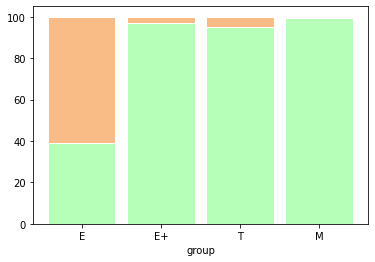

In [71]:
# Data
r = [0,1,2,3]
No_Descriptor = {'E': [201, 512, 830, 473], 'ET': [315, 17, 43, 4]}
df = pd.DataFrame(No_Descriptor)

#From raw value to percentage
totals = [i+j for i,j in zip(df['E'], df['ET'])]
greenBars = [i / j * 100 for i,j in zip(df['E'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['ET'], totals)]
# plot
barWidth = 0.85
names = ('E','E+','T','M')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
# Show graphic
plt.show()

## EDA by Platform

In [ ]:
# Plotting distribution of gaming platforms (Combined set)

psExclusives = len(combined_csv[ combined_csv['console'] == 0 ])
xboxExclusives = len(combined_csv[ combined_csv['console'] == 1 ])
availableOnBoth = len(combined_csv[ combined_csv['console'] == 2 ])
other =len(combined_csv[ combined_csv['console'] == 3 ])

nameList = ['Playstation Exclusives', 'Xbox Exclusives', 'Available on both', 'Others']
nameValues = [psExclusives, xboxExclusives, availableOnBoth, other]

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.bar(nameList, nameValues, color = 'blue')
plt.title('Game distribution per Platform [Combined set]')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.pie(nameValues, labels=nameList, autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(nameValues)/100))
plt.title('Game Distribution by Platform [Combined set]')
plt.show()

### EDA Platform Summary
- No data available in games 'Available on Both' platforms AND 'Others'
- Purely Console exclusive dataset

## EDA by Rating

In [ ]:
ratingplot(combined_csv, 'esrb_rating', 'Rating [Combined Set]')

### EDA Rating Summary
- 4 Ratings Present
    - Everyone
    - Everyone 10+
    - Teen
    - Mature
    
- Next Steps
    - Visualize correlation between features and ratings

## Correlation

In [ ]:
# One Hot Encoding Ratings
mapp = { 'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3,}

combined_csv['esrb_rating'] = combined_csv['esrb_rating'].map(mapp)

In [17]:
subjective_corr = combined_csv.corr()
subjective_corr[np.abs(subjective_corr)<.2]=0
mask = np.zeros_like(subjective_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

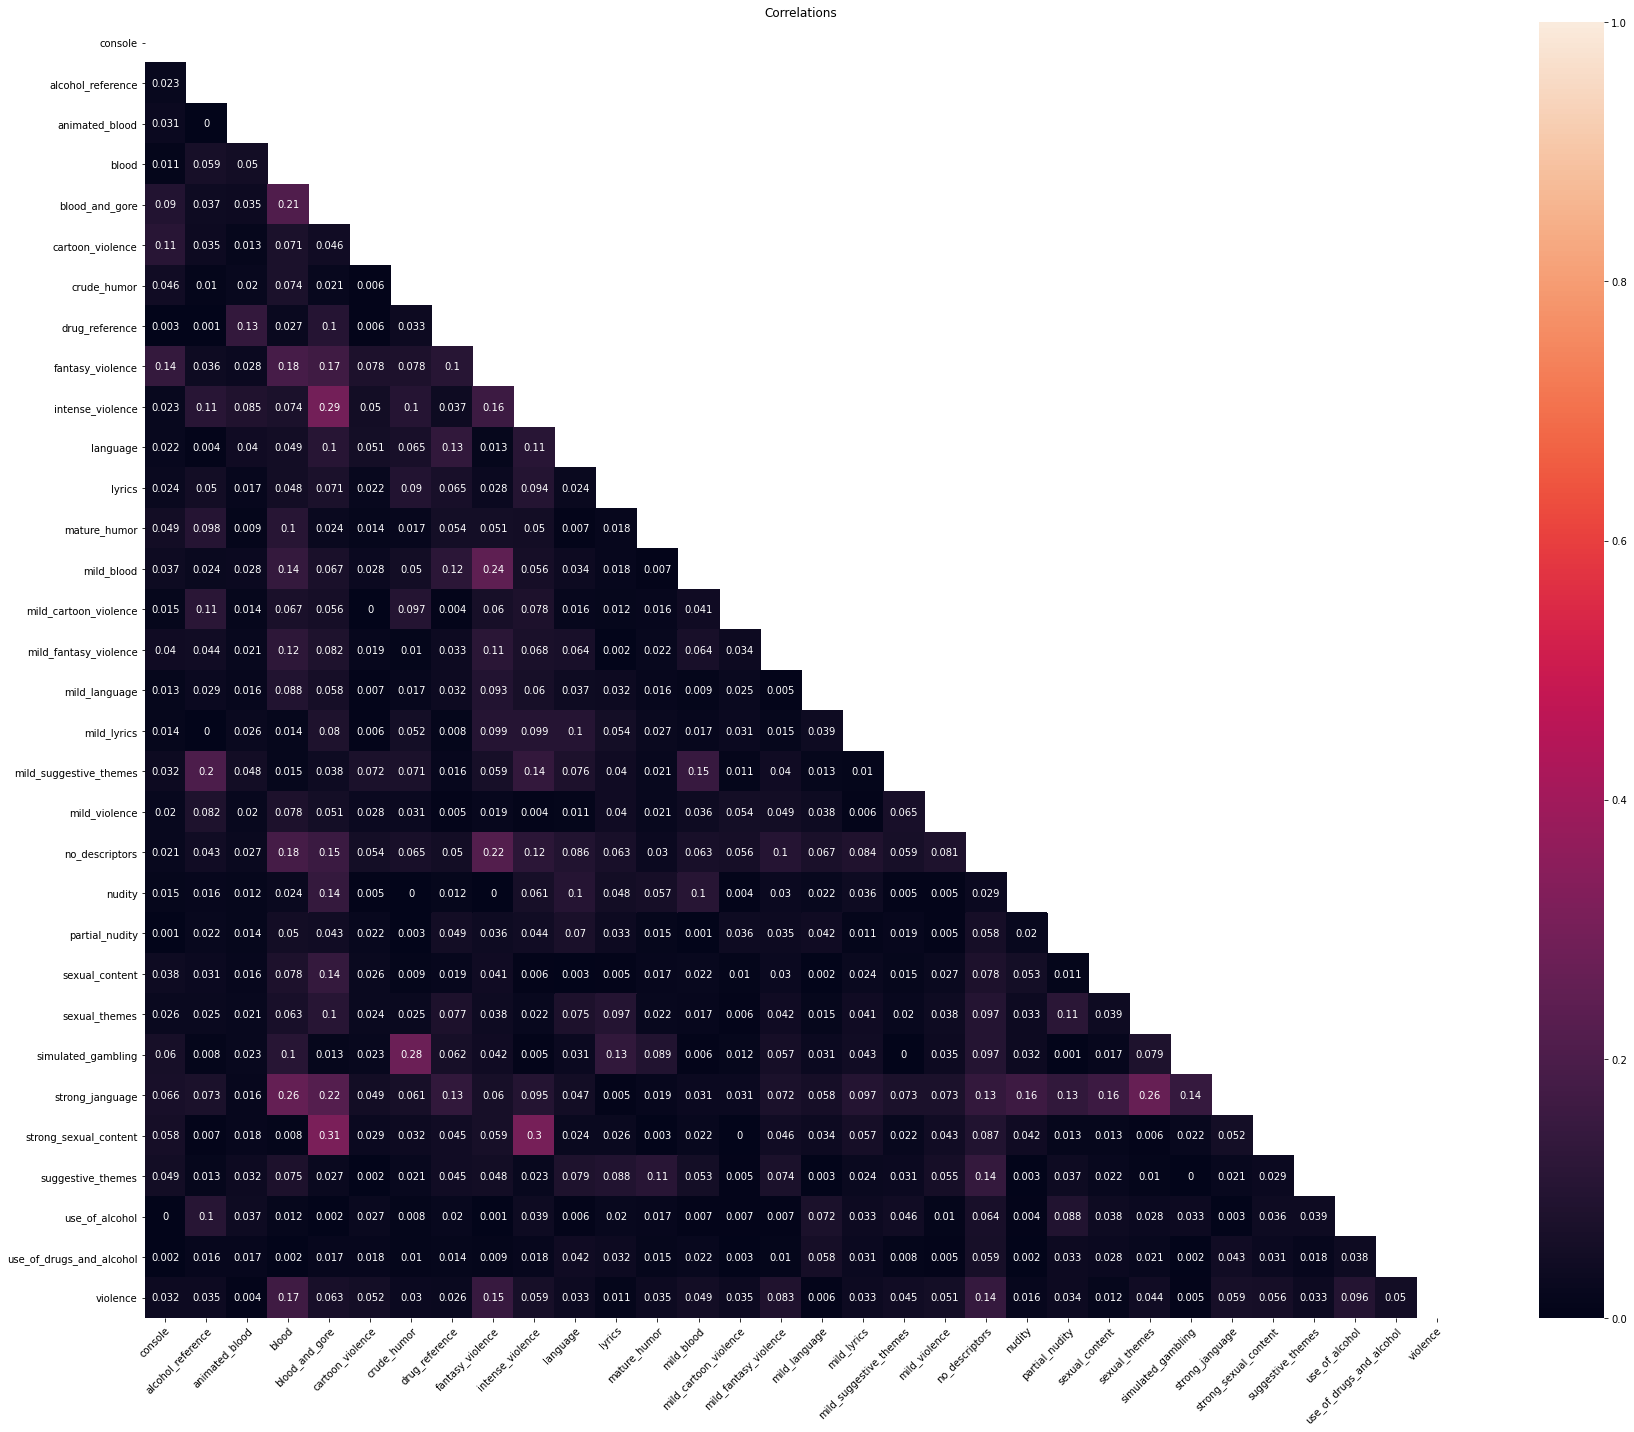

In [18]:
fig, ax = plt.subplots(figsize=(25,20))
corr = combined_csv.corr().abs().round(3)
sb.heatmap(corr, annot=True,ax=ax, mask=mask)
plt.setp(ax.get_xticklabels(), 
         rotation=45, 
         ha="right",
         rotation_mode="anchor")
ax.set_title('Correlations')
set_frameon(ax, True)
fig.tight_layout()

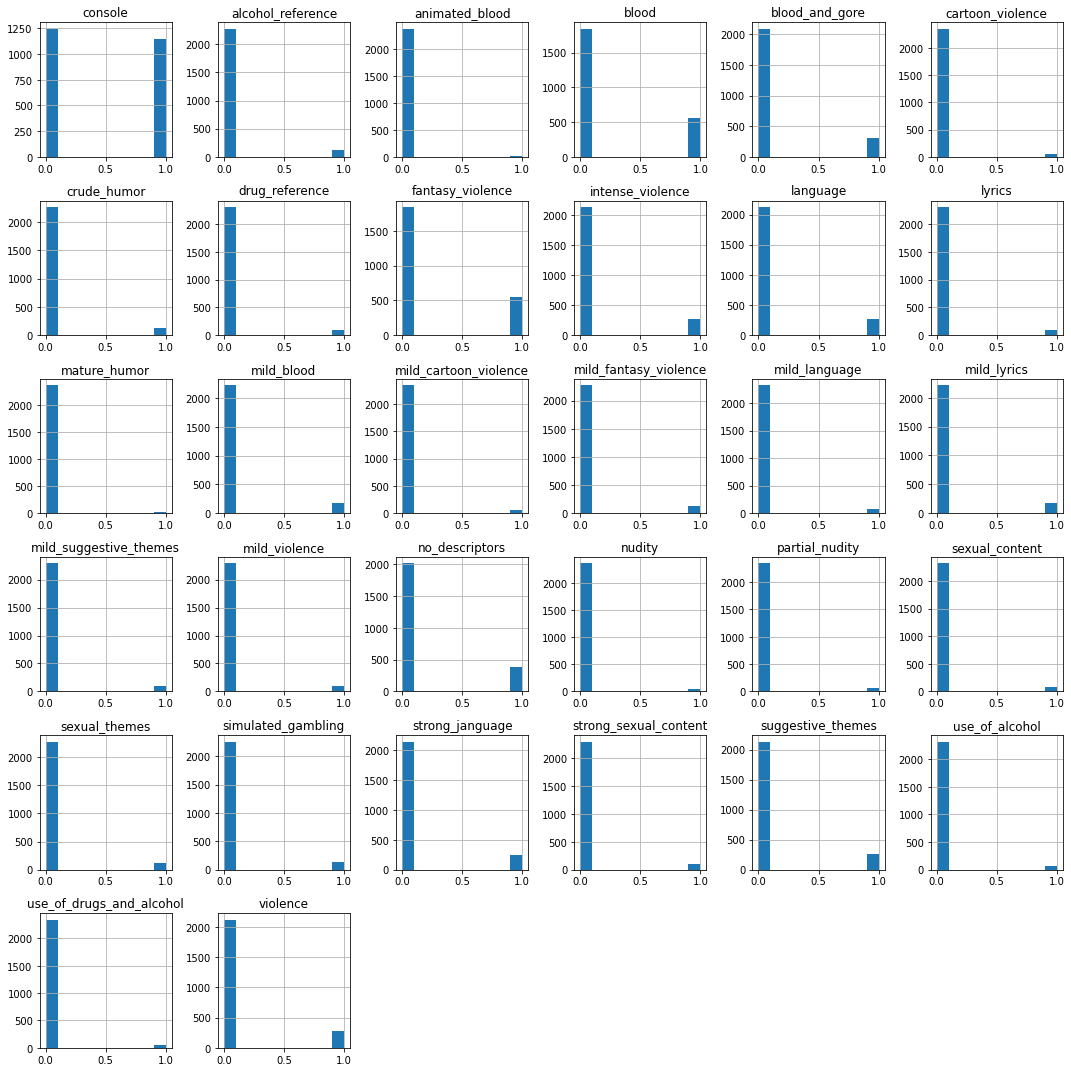

In [19]:
combined_csv.hist(figsize=(15,15))
plt.tight_layout()

# MODEL

## Evalution Metrics

- Ratings

- F1/Recall should be the most important metrics as       you descend the rating ladder. This mainly because you don't want games that may have Mature or Teen related content to be released to a rating of E so that children or young teenagers outside the ESRB's recommended ratings do not get exposed to such content.

- As the rating increases the overall metrics (for this dataset) show precisely how as more content gets added to a game increasing its rating, the lower recall, f1 and precision weigh on those ratings. If this dataset contained Ao (Adults Only) rating game content, that is when you'd want to put more emphasis on those same metrics again. You don't want a pornographic scene in a video game that would normally get rated Ao to get a rating of M. While the blowback would not be as bad as a Mature content ratred game recieving an E, it would still be bad. 

- TL:DR - You want stringent checking of the ratings for younger audiences, as those ratings increase with age the less importance is put on catching features and content associated with those ratings

## Train Test Split

In [20]:
X = combined_csv.drop(['esrb_rating', 'title'],1)

y = combined_csv[['esrb_rating']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Initial Model

### Decision Tree

In [21]:
dtc = DecisionTreeClassifier(criterion='entropy')

dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

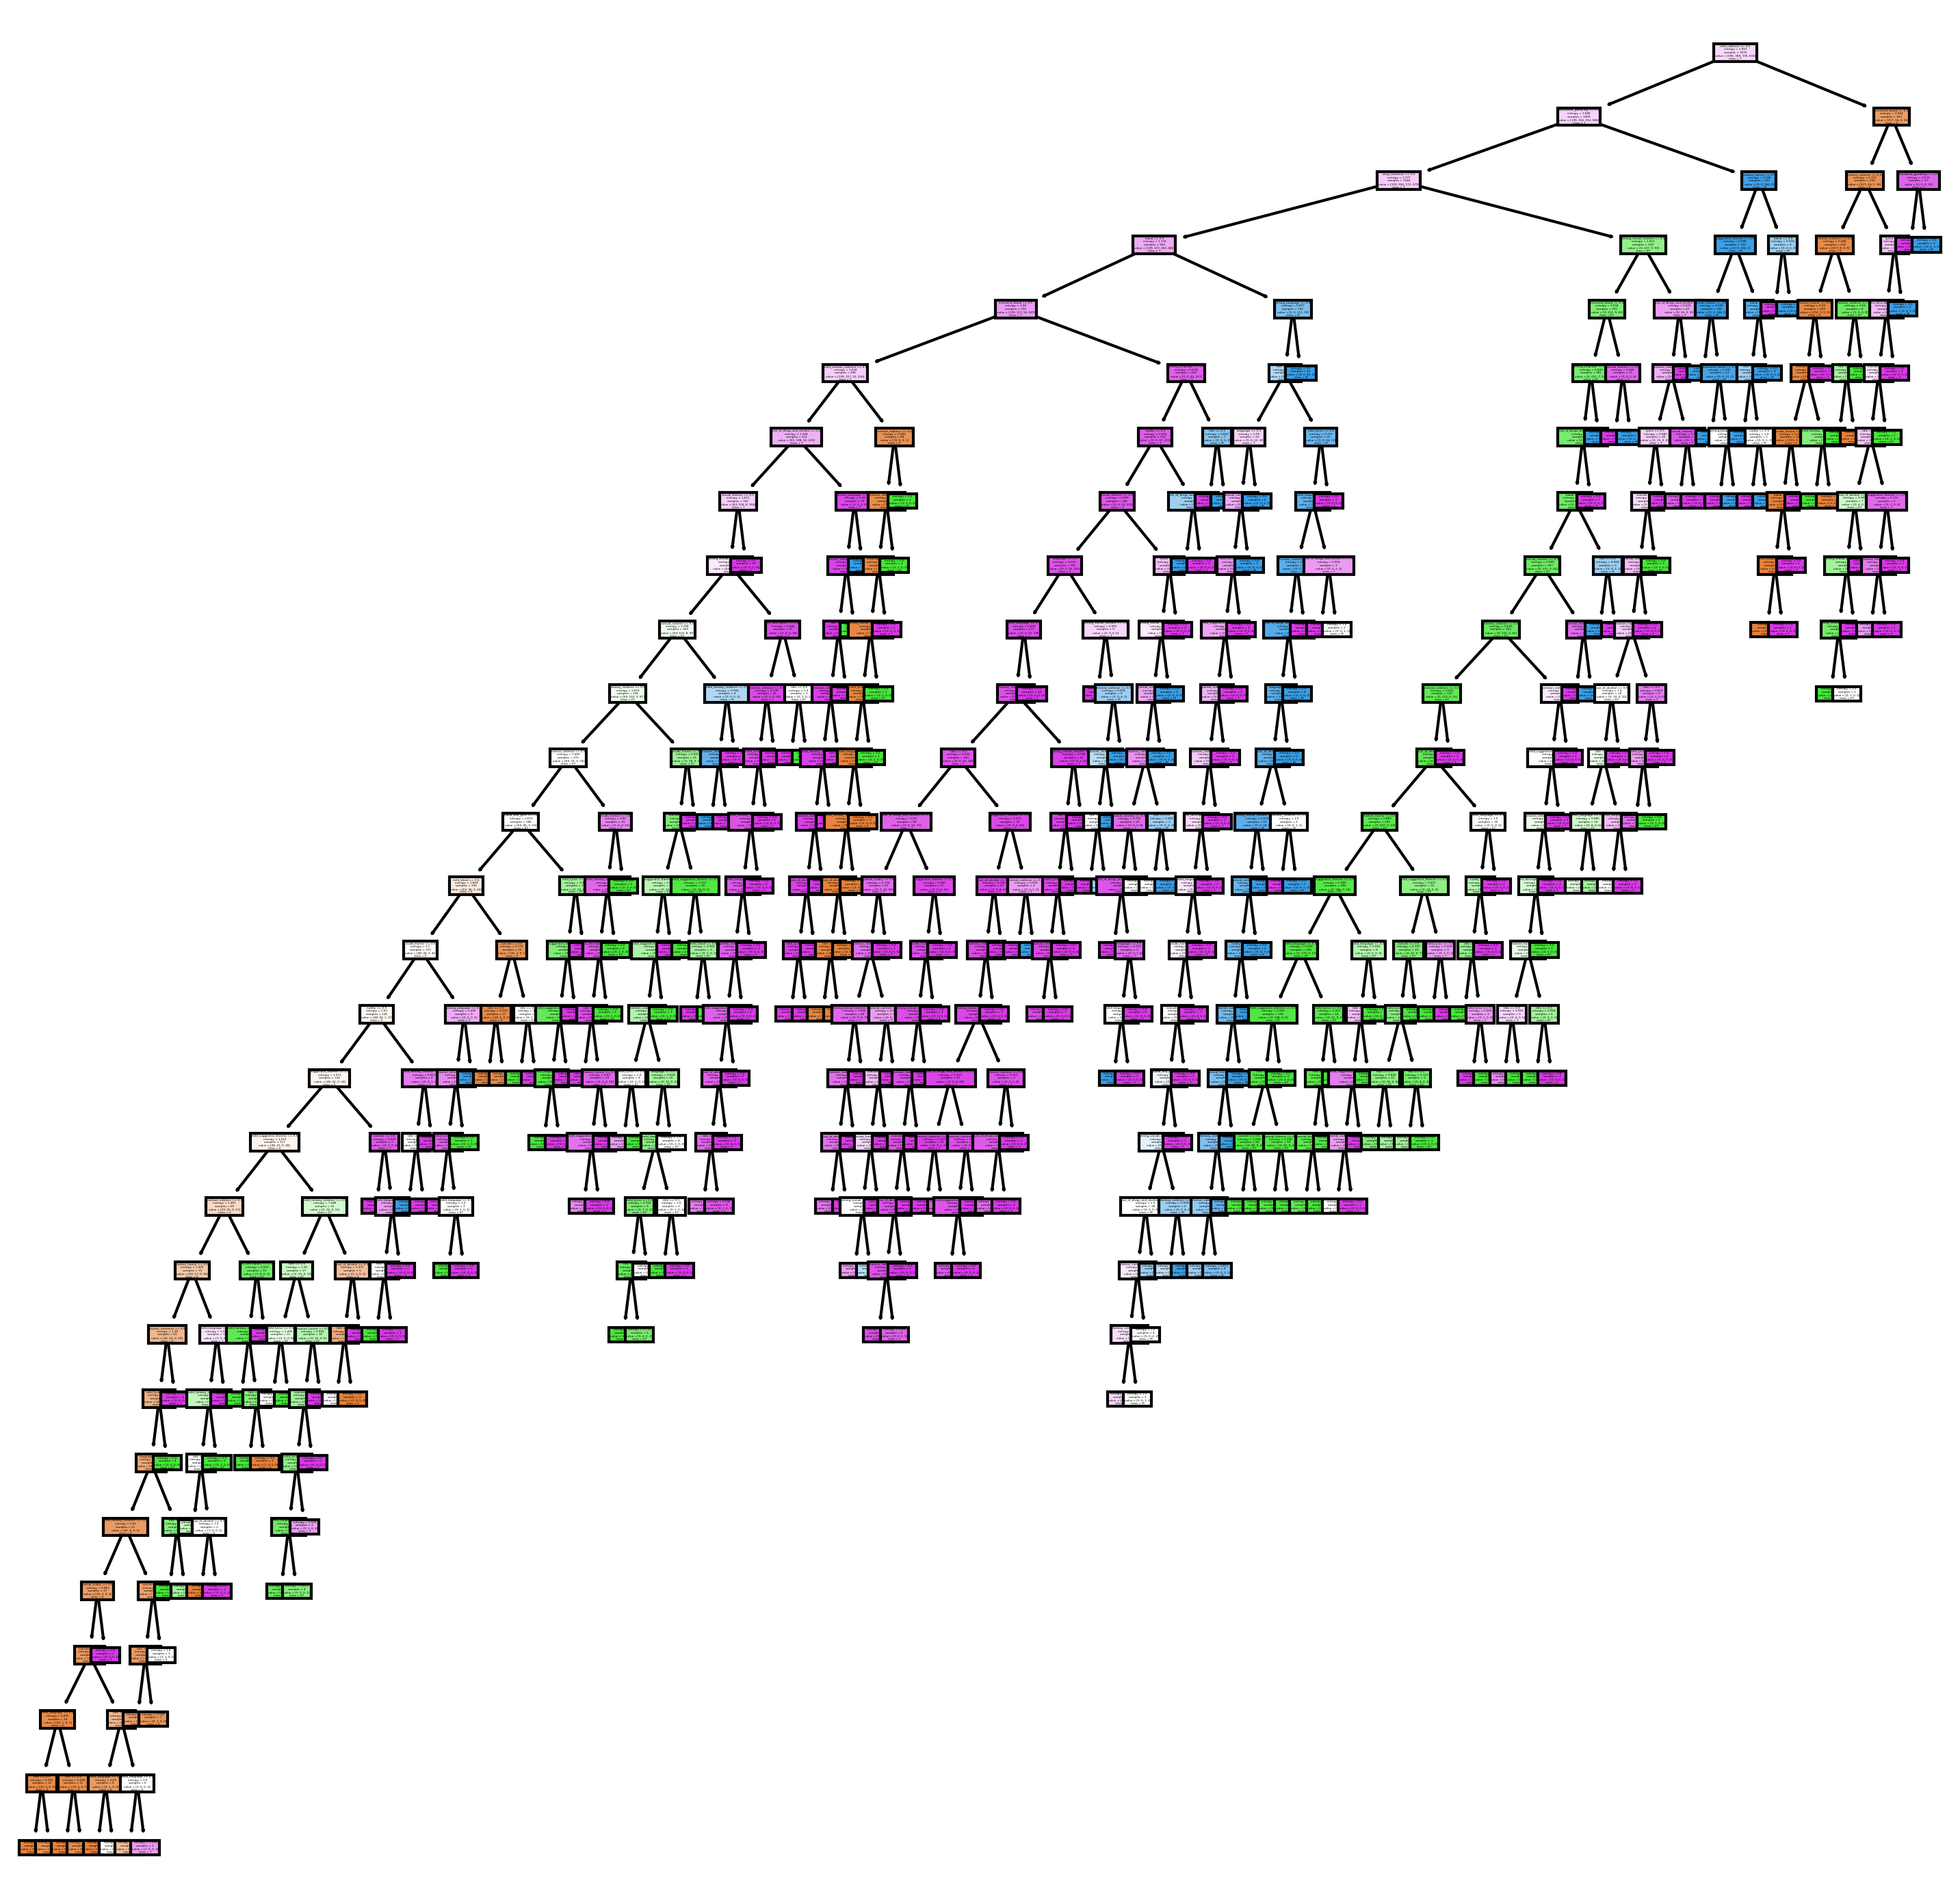

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=300)

tree.plot_tree(dtc,
               feature_names = combined_csv.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [23]:
# That is certainly overfit and busy

In [24]:
y_preds = dtc.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.847009735744089


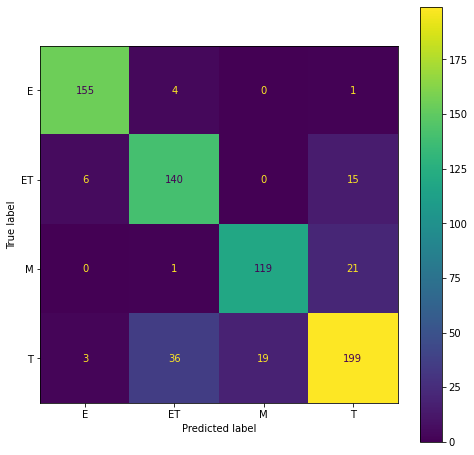

              precision    recall  f1-score   support

           E       0.95      0.97      0.96       160
          ET       0.77      0.87      0.82       161
           M       0.86      0.84      0.85       141
           T       0.84      0.77      0.81       257

    accuracy                           0.85       719
   macro avg       0.86      0.86      0.86       719
weighted avg       0.85      0.85      0.85       719

Accuracy:85.26%


In [25]:
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=dtc)

### KNN

In [26]:
knn = KNeighborsClassifier()

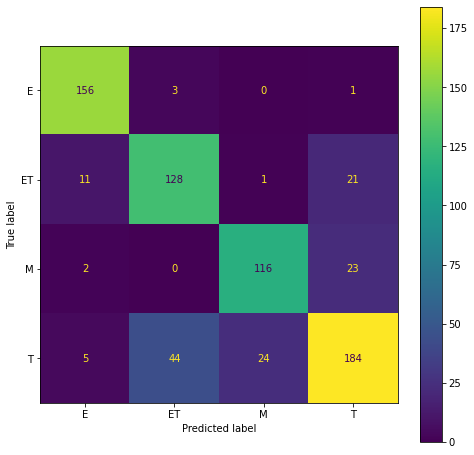

              precision    recall  f1-score   support

           E       0.90      0.97      0.93       160
          ET       0.73      0.80      0.76       161
           M       0.82      0.82      0.82       141
           T       0.80      0.72      0.76       257

    accuracy                           0.81       719
   macro avg       0.81      0.83      0.82       719
weighted avg       0.81      0.81      0.81       719

Accuracy:81.22%


In [27]:
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=knn)

### Random Forest

In [28]:
rfc = RandomForestClassifier()

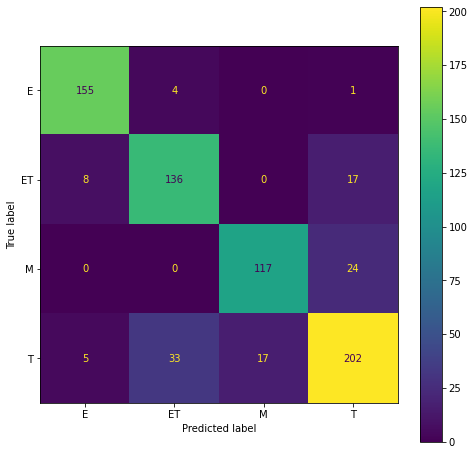

              precision    recall  f1-score   support

           E       0.92      0.97      0.95       160
          ET       0.79      0.84      0.81       161
           M       0.87      0.83      0.85       141
           T       0.83      0.79      0.81       257

    accuracy                           0.85       719
   macro avg       0.85      0.86      0.85       719
weighted avg       0.85      0.85      0.85       719

Accuracy:84.84%


In [29]:
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=rfc)

In [30]:
rfc.feature_importances_

array([0.02651022, 0.01758055, 0.00796126, 0.08439138, 0.08755051,
       0.01436721, 0.02397107, 0.01289248, 0.10058867, 0.02492422,
       0.03710323, 0.01221421, 0.00330806, 0.02082182, 0.00854794,
       0.03903441, 0.01106677, 0.01607613, 0.01811982, 0.0161113 ,
       0.11062655, 0.00534471, 0.01173379, 0.00715061, 0.01734043,
       0.02330943, 0.11109637, 0.02915551, 0.03362336, 0.01385752,
       0.0085956 , 0.04502485])

# Refined Models

### Decision Tree Refined Model

In [31]:
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [32]:
dtc_grid_search = GridSearchCV(dtc, dtc_param_grid, cv=3, return_train_score=True)

dtc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [33]:
bestdtc = dtc_grid_search.best_estimator_

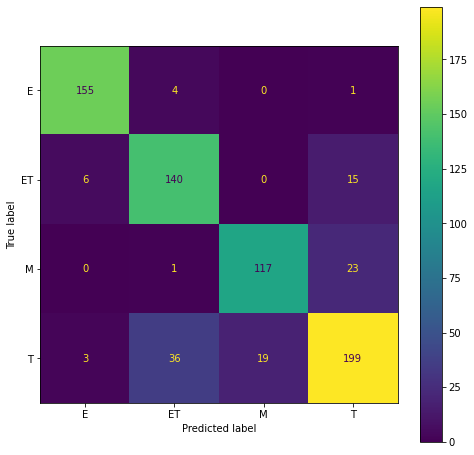

              precision    recall  f1-score   support

           E       0.95      0.97      0.96       160
          ET       0.77      0.87      0.82       161
           M       0.86      0.83      0.84       141
           T       0.84      0.77      0.80       257

    accuracy                           0.85       719
   macro avg       0.85      0.86      0.86       719
weighted avg       0.85      0.85      0.85       719

Accuracy:84.98%


In [34]:
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=bestdtc)

### KNN Refined Model

In [35]:
knn_param_grid = {
    'n_neighbors': [3,5,7],
    'weights': ['uniform','distance'],
    'algorithm': ['ball_tree','kd_tree','brute'],
    'p':[1,2,3]
}

In [36]:
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=3, return_train_score=True)

knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [37]:
bestknn = knn_grid_search.best_estimator_

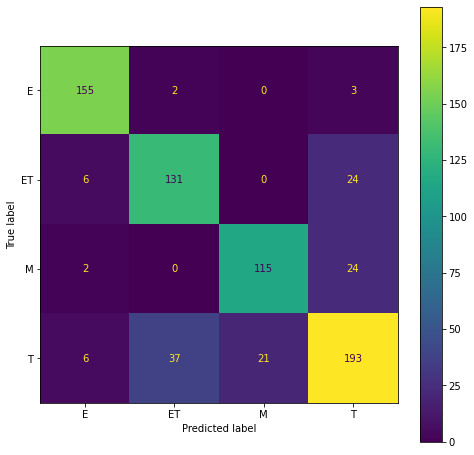

              precision    recall  f1-score   support

           E       0.92      0.97      0.94       160
          ET       0.77      0.81      0.79       161
           M       0.85      0.82      0.83       141
           T       0.79      0.75      0.77       257

    accuracy                           0.83       719
   macro avg       0.83      0.84      0.83       719
weighted avg       0.83      0.83      0.83       719

Accuracy:82.61%


In [38]:
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=bestknn)

### Random Forest Refined

In [39]:
rfc_param_grid = {
    'n_estimators': [50,100],
    'criterion': ['gini','entropy'],
    'max_depth': [None,3, 5, 7],
    'min_samples_split': [1, 2, 4, 6],
    'min_samples_leaf': [1,2,3],
    'max_features': [None,'sqrt','log2'],
    'random_state': [7],
    
}

In [40]:
rfc_grid_search = GridSearchCV(rfc, rfc_param_grid, cv=3,n_jobs=10, return_train_score=True)

rfc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 4, 6],
                         'n_estimators': [50, 100], 'random_state': [7]},
             return_train_score=True)

In [41]:
bestrfc = rfc_grid_search.best_estimator_

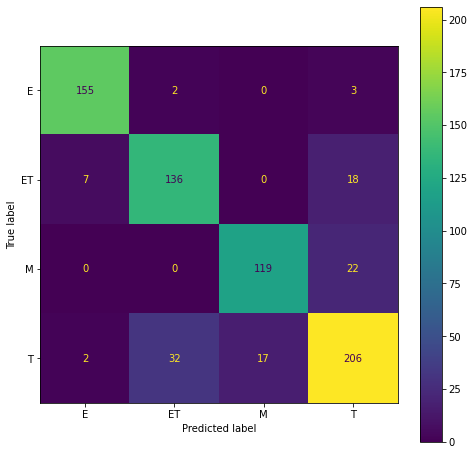

              precision    recall  f1-score   support

           E       0.95      0.97      0.96       160
          ET       0.80      0.84      0.82       161
           M       0.88      0.84      0.86       141
           T       0.83      0.80      0.81       257

    accuracy                           0.86       719
   macro avg       0.86      0.86      0.86       719
weighted avg       0.86      0.86      0.86       719

Accuracy:85.67%


In [42]:
classification(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    classifier=bestrfc)

# INTERPRET

# CONCLUSIONS & RECCOMENDATIONS